## Importing Libraries 

In [93]:
import numpy as np 
import pandas as pd 
from sklearn import metrics 
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
import seaborn as sns 

## Loading and Displaying the Dataset

In [94]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class labels']
data = pd.read_csv("iris.data", names = columns)
data

,Sepal length,Sepal width,Petal length,Petal width,Class labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory Data Analysis (EDA)

In [75]:
data.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Class labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [77]:
data.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Class labels    0
dtype: int64

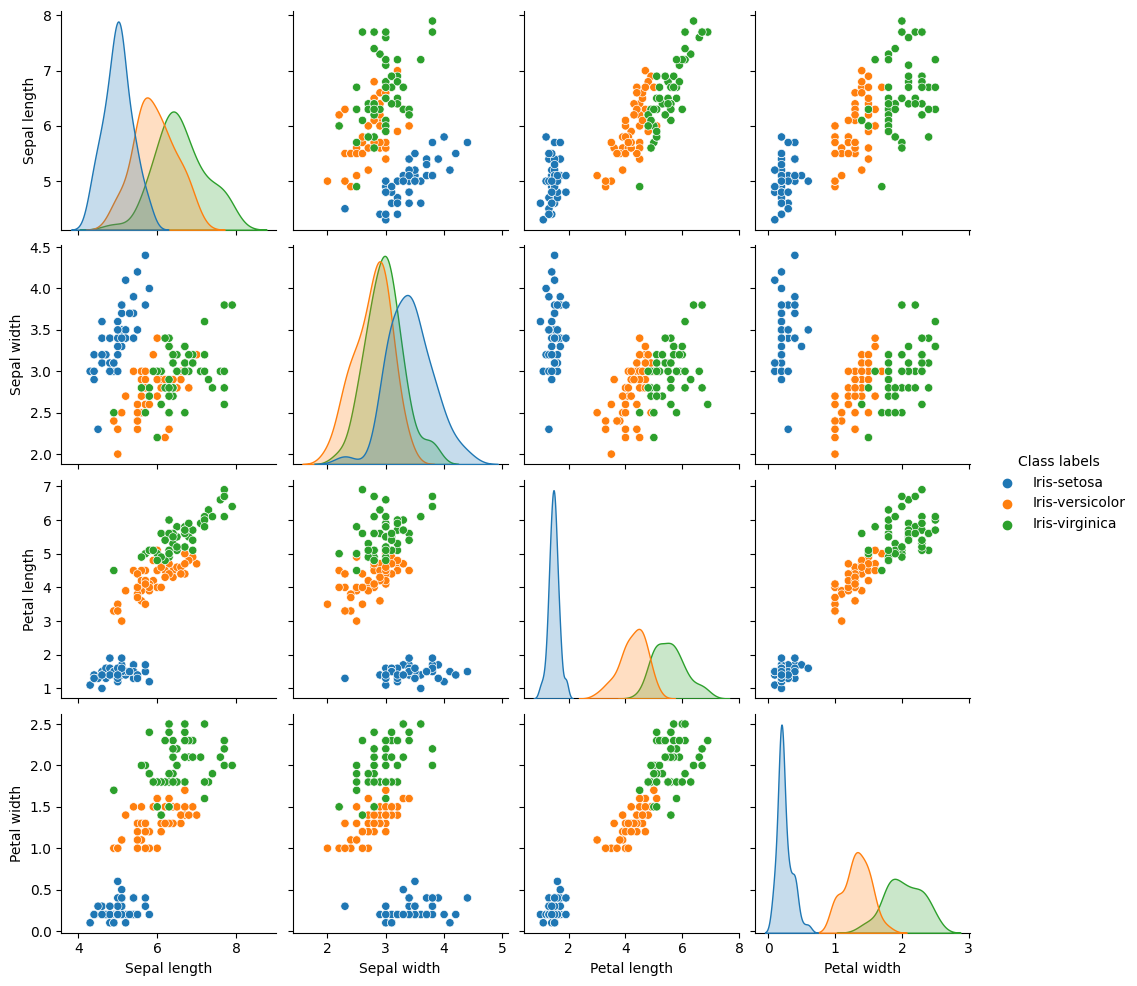

In [78]:
sns.pairplot(data, hue = 'Class labels')

## Train-Test Splitting

In [79]:
train,test = train_test_split(data,test_size = 0.2)

In [80]:
train

,Sepal length,Sepal width,Petal length,Petal width,Class labels
56,6.3,3.3,4.7,1.6,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
...,...,...,...,...,...
44,5.1,3.8,1.9,0.4,Iris-setosa
115,6.4,3.2,5.3,2.3,Iris-virginica
70,5.9,3.2,4.8,1.8,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa


In [81]:
test

,Sepal length,Sepal width,Petal length,Petal width,Class labels
89,5.5,2.5,4.0,1.3,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
96,5.7,2.9,4.2,1.3,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa


In [82]:
# Extracting the feature column X and the target column Y for the training set
train_X = train[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
train_Y = train['Class labels']

In [83]:
train_X

,Sepal length,Sepal width,Petal length,Petal width
56,6.3,3.3,4.7,1.6
63,6.1,2.9,4.7,1.4
59,5.2,2.7,3.9,1.4
3,4.6,3.1,1.5,0.2
32,5.2,4.1,1.5,0.1
...,...,...,...,...
44,5.1,3.8,1.9,0.4
115,6.4,3.2,5.3,2.3
70,5.9,3.2,4.8,1.8
18,5.7,3.8,1.7,0.3


In [84]:
train_Y

56     Iris-versicolor
63     Iris-versicolor
59     Iris-versicolor
3          Iris-setosa
32         Iris-setosa
            ...       
44         Iris-setosa
115     Iris-virginica
70     Iris-versicolor
18         Iris-setosa
31         Iris-setosa
Name: Class labels, Length: 120, dtype: object

In [85]:
# Extracting the feature column X and the target column Y for the testing set
test_X = test[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
test_Y = test['Class labels']

## Support Vector Machine (SVM) Model Training and Evaluation

In [86]:
model = svm.SVC()
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)

In [87]:
metrics.accuracy_score(prediction1,test_Y)*100


96.66666666666667

## Decision tree Model Training and Evaluation

In [88]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)

DecisionTreeClassifier()

In [89]:
prediction2 = model.predict(test_X)
metrics.accuracy_score(prediction2,test_Y)*100

93.33333333333333

In [90]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, prediction1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [91]:
print(classification_report(test_Y, prediction2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



## Prediction

In [92]:
new_X = np.array([[2,4.5,2,0.5], [2,1,1.1,0]])
prediction = model.predict(new_X)
print("Prediction of species: {}".format(prediction))

Prediction of species: ['Iris-setosa' 'Iris-setosa']


D:\python 3.10\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
